In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Palladium.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

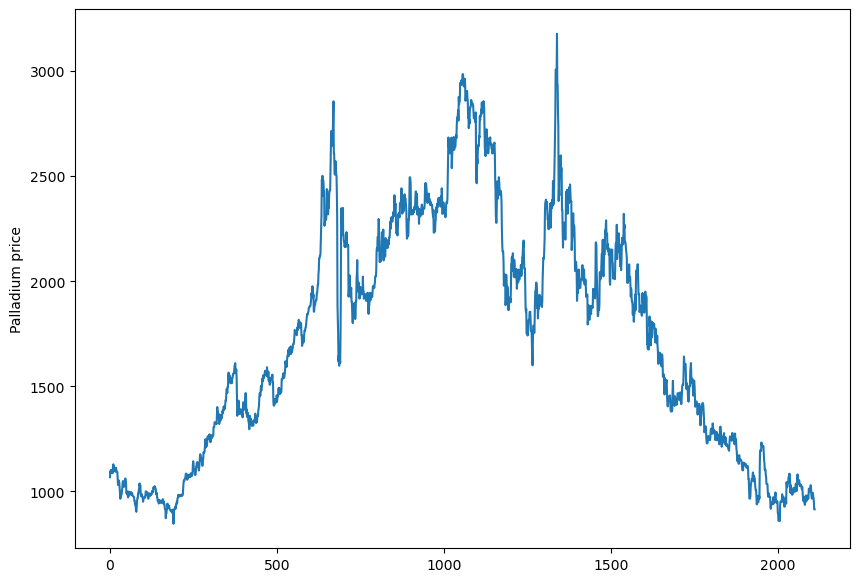

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Palladium price")
plt.show()


In [6]:
t = .8
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.7172770580223201
c:  1256.1874058235758


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,2466.951080
1,2467.668357
2,2468.385634
3,2469.102911
4,2469.820188
...,...
417,2766.055613
418,2766.772890
419,2767.490167
420,2768.207444


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 129.97699313759568
Mean Squared Error (MSE): 2161469.5210175873
Root Mean Squared Error (RMSE): 1470.1937018697868


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2769.64199825 2770.35927531 2771.07655237 2771.79382942 2772.51110648
 2773.22838354 2773.9456606  2774.66293766 2775.38021471 2776.09749177
 2776.81476883 2777.53204589 2778.24932295 2778.9666     2779.68387706
 2780.40115412 2781.11843118 2781.83570824 2782.5529853  2783.27026235
 2783.98753941 2784.70481647 2785.42209353 2786.13937059 2786.85664764
 2787.5739247  2788.29120176 2789.00847882 2789.72575588 2790.44303293
 2791.16030999 2791.87758705 2792.59486411 2793.31214117 2794.02941822
 2794.74669528 2795.46397234 2796.1812494  2796.89852646 2797.61580351
 2798.33308057 2799.05035763 2799.76763469 2800.48491175 2801.2021888
 2801.91946586 2802.63674292 2803.35401998 2804.07129704 2804.78857409
 2805.50585115 2806.22312821 2806.94040527 2807.65768233 2808.37495938
 2809.09223644 2809.8095135  2810.52679056 2811.24406762 2811.96134467
 2812.67862173 2813.39589879 2814.11317585 2814.83045291 2815.54772996
 2816.26500702 2816.98228408 28

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

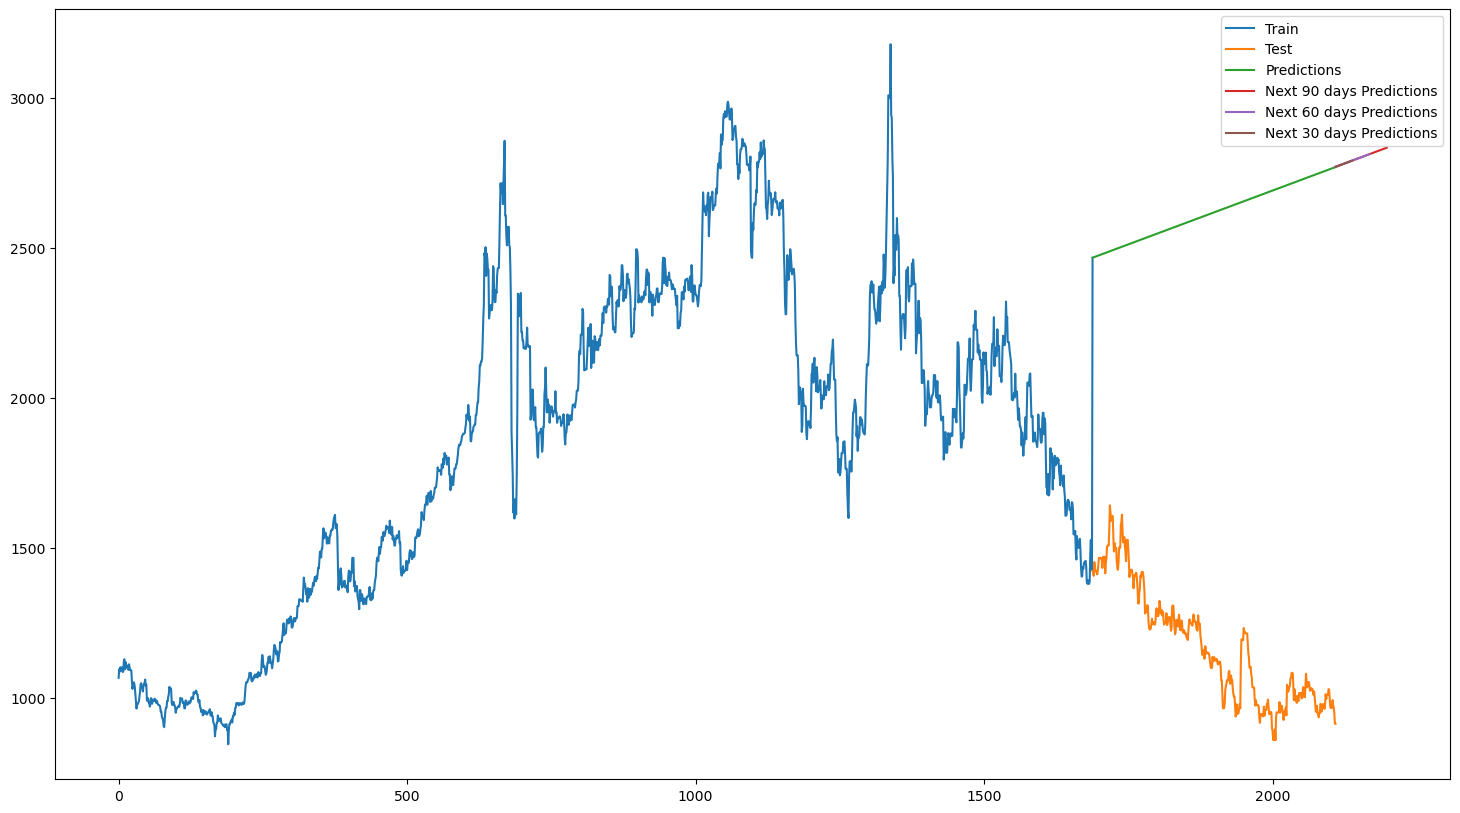

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()